<a href="https://colab.research.google.com/github/Lunue/student-projects/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loads and preprocess the images uploaded

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 9 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


the actual model

In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu',
   input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), activation ='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes,
                 activation='softmax')

    ])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,610 (18.42 MB)

 Trainable params: 4,828,610 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

training the actual model

In [19]:
histor = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5556 - loss: 0.7024 - val_accuracy: 0.5000 - val_loss: 0.6813
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 541ms/step - accuracy: 0.6667 - loss: 0.5455 - val_accuracy: 0.5000 - val_loss: 2.0289
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step - accuracy: 0.4444 - loss: 1.4925 - val_accuracy: 0.5000 - val_loss: 0.8664
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 847ms/step - accuracy: 0.5556 - loss: 0.6518 - val_accuracy: 0.5000 - val_loss: 0.6990
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 872ms/step - accuracy: 0.6667 - loss: 0.4844 - val_accuracy: 1.0000 - val_loss: 0.5210
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.3078 - val_accuracy: 0.5000 - val_loss: 0.5546
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step - accuracy: 0.8889 - loss: 0.2920 - val_accuracy: 0.5000 - val_loss: 0.5457
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step - accuracy: 1.0000 - loss: 0.2306 - val_accuracy: 0.5000 - val_loss: 0.564

manually uploading images directly to colab

In [21]:
from google.colab import files
uploaded = files.upload()

Saving unnamed.jpeg to unnamed.jpeg


testing the uploaded image

In [23]:
from tensorflow.keras.preprocessing import image

img = image.load_img('unnamed.jpeg',
                     target_size=(150,150))

In [31]:
model.save('image_classifier.keras')

testing and displaying prediction

Saving download (1).jpeg to download (1) (1).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


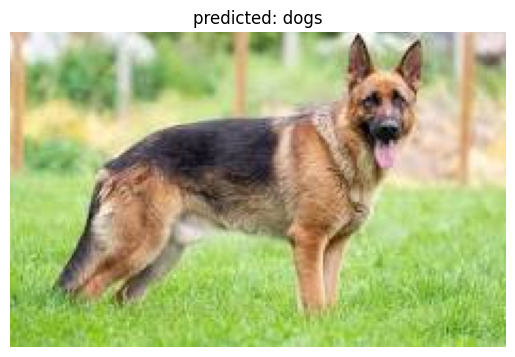

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size = (150,150))
image_array = image.img_to_array(img)
img_array = np.expand_dims(image_array, axis=0)/255.0

predictions = model.predict(img_array)
class_index = np.argmax(predictions)
predicted_class = list(train_data.class_indices.keys())


plt.imshow(image.load_img(img_path))
plt.title(f"predicted: {predicted_class[class_index]}")
plt.axis('off')
plt.show()

mounting my drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


helping the imagedatagenerator find the images correctly

In [11]:
data_dir = '/content/drive/MyDrive/dataset'